In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget


In [2]:
bigdata = pd.read_csv("regression_data.csv")
bigdata

,X,Y
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440
...,...,...
95,0.987591,6.146963
96,1.045466,7.059295
97,0.855082,6.906398
98,0.050838,4.429206


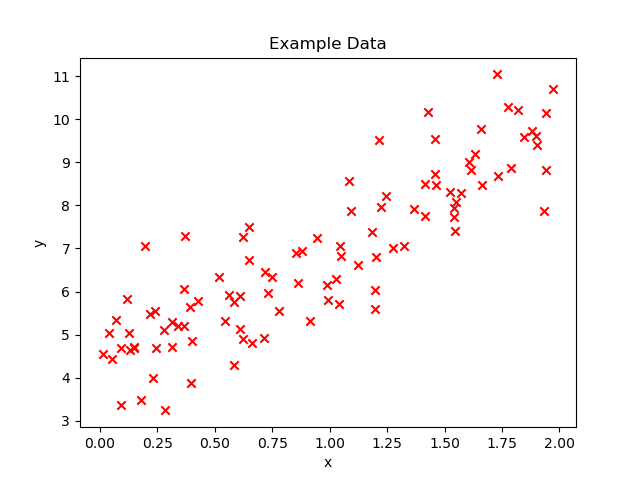

In [3]:
fig, ax = plt.subplots()
ax.scatter(bigdata["X"], bigdata["Y"], marker="x", c="r")
ax.set(xlabel="x", ylabel="y", title="Example Data")
plt.show()

In [4]:
def calc_cost_function(w, b, data):
    m = len(data)
    cost = 0
    for i in range(m):
        x = data.iloc[i].X
        y = data.iloc[i].Y

        cost +=  ((x * w + b) - y)**2
    return cost / (2 * m)

In [5]:
def gradient_descent(w_current, b_current, data, LR):
    w_gradient = 0
    b_gradient = 0
    m = len(data)

    for i in range(m):

        x = data.iloc[i].X
        y = data.iloc[i].Y

        w_gradient += (1 / m) * (x) * ((w_current * x + b_current) - y) 
        b_gradient += (1 / m) * ((w_current * x + b_current) - y) 
    
    w = w_current - LR*w_gradient
    b = b_current - LR*b_gradient
    
    return w, b


In [ ]:
x_vals_test = np.linspace(bigdata["X"].min(), bigdata["X"].max(), 200)  

w = 0
b = 0
LR = 0.001
epochs = 3000
w_for_contour = np.zeros(30)
b_for_contour = np.zeros(30)
for i in range(epochs):
    w, b = gradient_descent(w, b, bigdata, LR)
    
    if i%100 == 0:
        w_for_contour[i//100] = w
        b_for_contour[i//100] = b
print(f"final w = {w},  b = {b}")



final w = 3.2902735615465466,  b = 3.6110779222963667


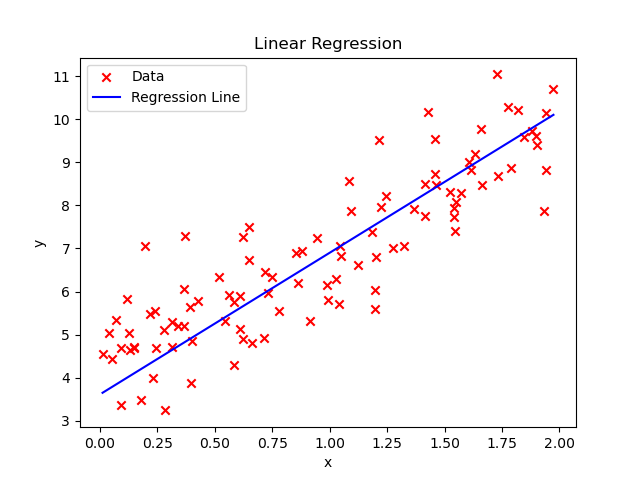

In [7]:
fig, ax = plt.subplots()


ax.scatter(bigdata["X"], bigdata["Y"], marker="x", c="r", label="Data")

x_vals = np.linspace(bigdata["X"].min(), bigdata["X"].max(), 200)  
y_vals = np.zeros_like(x_vals)

for i in range(len(x_vals)):
     y_vals[i] = w * x_vals[i] + b  

ax.plot(x_vals, y_vals, c="b", label="Regression Line")

ax.set(xlabel="x", ylabel="y", title="Linear Regression")
ax.legend()

plt.show()

In [8]:
cost_val = calc_cost_function(w, b, bigdata)
cost_val

np.float64(0.4573023074991478)

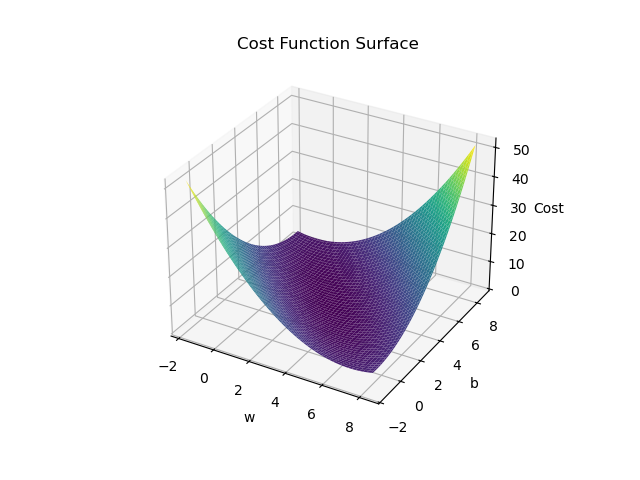

In [17]:



w_data = np.linspace(3.29 -5 , 3.29 + 5, 100)
b_data = np.linspace(3.61 -5, 3.61 + 5, 100)
W_data, B_data = np.meshgrid(w_data, b_data)

Z = np.zeros_like(W_data)
for i in range(W_data.shape[0]):
    for j in range(W_data.shape[1]):
        Z[i, j] = calc_cost_function(W_data[i, j], B_data[i, j], bigdata)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W_data, B_data, Z, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')
plt.show()

In [10]:
w_for_contour.min(), w_for_contour.max(), b_for_contour.min(), b_for_contour.max()

(np.float64(0.007384082580524258),
 np.float64(3.337219021177801),
 np.float64(0.006820004100101896),
 np.float64(3.599471286472009))

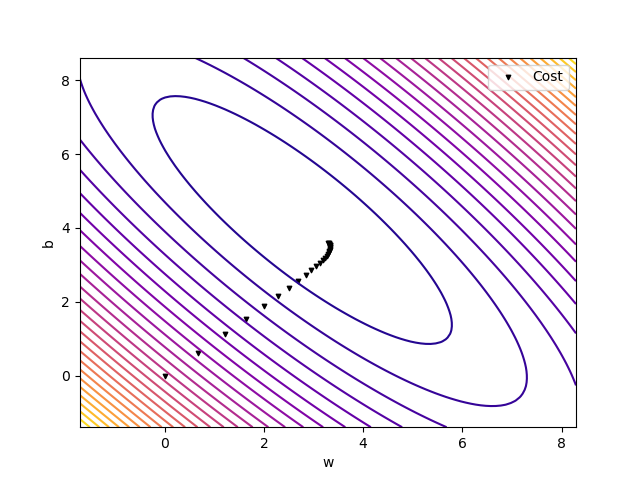

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
contour = ax.contour(W_data, B_data, Z, levels=30, cmap='plasma')
ax.scatter(w_for_contour,b_for_contour , c='black', marker='v', s=10, label="Cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
plt.legend()
plt.show()